# 0.加载包

In [189]:
#其他的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import scipy as sp 

#封装进度条的函数
from tqdm import tqdm   
from astropy.io import fits

# matpltlib 库以及参数
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams.update({'axes.labelsize': 'large'})
matplotlib.rcParams.update({'xtick.labelsize': 'large'})
matplotlib.rcParams.update({'ytick.labelsize': 'large'})
matplotlib.rcParams.update({'legend.fontsize': 'large'})
matplotlib.rcParams.update({'errorbar.capsize': 3})

# 1.加载数据以及提取数据
-   194782.csv是文献引用的HSC的Quasar的数据。是用dr7星表在HSC数据库中检索的数据，用到的数据包含位置ra,dec和gri三个band的com和psf光度，以及误差\
    dr7qso.fit是SDSS_dr7类星体的数据\
    dr7_bh_Nov19_2013.fits是SDSSdr7的新表，里面有黑洞的一些参数，用到的有'LOGBH','LOGEDD_RATIO','LOGLBOL'\
-   这几个文件存放于 ./DATA

# 1.0.加载原始数据

In [190]:
df_HSC_org =pd.read_csv('./DATA/ORGIN/194782.csv', dtype={'object_id': 'str'})
hdu_dr7pr=fits.open('./DATA/ORGIN/dr7_bh_Nov19_2013.fits')
hdu_SDSS=fits.open('./DATA/ORGIN/dr7qso.fit')#用上了
#hdu_SDSS[1].data

# 1.1.处理SDSS数据

In [191]:
#用Table打开，保存成表格
from astropy.table import Table
data_org = Table.read('./DATA/ORGIN/dr7qso.fit', hdu=1)
df_SDSS_org=data_org.to_pandas()

#改名字
df_SDSS=df_SDSS_org[['SDSSJ', 'RA', 'DEC', 'z',  'GMAG', 'GMAGERR','RMAG','RMAGERR', 'IMAG', 'IMAGERR']]
names=['SDSS_NAME','RA','DEC','REDSHIFT','g_SDSS','gerr_SDSS','r_SDSS','rerr_SDSS','i_SDSS','ierr_SDSS']
df_SDSS.columns=names

#展示
df_SDSS

,SDSS_NAME,RA,DEC,REDSHIFT,g_SDSS,gerr_SDSS,r_SDSS,rerr_SDSS,i_SDSS,ierr_SDSS
0,b'000006.53+003055.2',0.027228,0.515341,1.8246,20.461,0.034,20.324,0.038,20.093,0.041
1,b'000008.13+001634.6',0.033900,0.276301,1.8373,20.206,0.024,19.941,0.032,19.485,0.032
2,b'000009.26+151754.5',0.038604,15.298477,1.1985,19.807,0.036,19.374,0.017,19.148,0.023
3,b'000009.38+135618.4',0.039089,13.938450,2.2342,18.886,0.022,18.427,0.018,18.301,0.024
4,b'000009.42-102751.9',0.039271,-10.464426,1.8449,19.019,0.027,18.966,0.021,18.775,0.018
...,...,...,...,...,...,...,...,...,...,...
105778,b'235958.21+005139.8',359.992552,0.861057,2.0387,18.985,0.021,18.770,0.017,18.525,0.033
105779,b'235958.66-011225.3',359.994452,-1.207033,1.7718,18.772,0.030,18.711,0.020,18.488,0.020
105780,b'235958.72+003345.3',359.994688,0.562592,1.6937,19.872,0.028,19.711,0.030,19.386,0.026
105781,b'235959.06-090944.0',359.996092,-9.162233,1.2834,18.352,0.015,18.140,0.024,18.114,0.022


# 1.2.dr7

In [192]:
columns=['SDSS_NAME','RA','DEC','REDSHIFT','LOGBH','LOGEDD_RATIO','LOGLBOL']
df_dr7pr=pd.DataFrame(columns=columns)
for i in columns:
    df_dr7pr[i]=hdu_dr7pr[1].data.field(i)
df_dr7pr

,SDSS_NAME,RA,DEC,REDSHIFT,LOGBH,LOGEDD_RATIO,LOGLBOL
0,000006.53+003055.2,0.027228,0.515341,1.8246,9.284316,-1.348913,46.035774
1,000008.13+001634.6,0.033900,0.276301,1.8373,9.169480,-0.893524,46.376326
2,000009.26+151754.5,0.038604,15.298477,1.1985,8.499874,-0.439535,46.160709
3,000009.38+135618.4,0.039089,13.938450,2.2342,9.664923,-0.723758,47.041535
4,000009.42-102751.9,0.039271,-10.464426,1.8449,10.036432,-1.501198,46.635604
...,...,...,...,...,...,...,...
105778,235958.21+005139.8,359.992554,0.861057,2.0387,9.987033,-1.146473,46.940930
105779,235958.66-011225.3,359.994446,-1.207033,1.7718,9.223171,-0.668630,46.654912
105780,235958.72+003345.3,359.994690,0.562592,1.6937,9.267272,-1.086099,46.281544
105781,235959.06-090944.0,359.996094,-9.162233,1.2834,9.024543,-0.498561,46.626352


# 验证

In [193]:
np.where(   df_dr7pr['SDSS_NAME']==str(df_SDSS['SDSS_NAME']))#坑!df_SDSS的SDSS_NAME是byte类型，要转化成string
l=np.where(   abs(df_dr7pr['RA']-df_SDSS['RA'])>1/36000 )[0]#1/36000度是0.1角秒，这个结果表示在0.1角秒精度上是数据是相同的
print(l)


[]


In [194]:
df_dr7pr=df_dr7pr[['LOGBH','LOGEDD_RATIO','LOGLBOL']]
df_SDSSpr=pd.concat((df_SDSS,df_dr7pr),axis=1)
df_SDSSpr

,SDSS_NAME,RA,DEC,REDSHIFT,g_SDSS,gerr_SDSS,r_SDSS,rerr_SDSS,i_SDSS,ierr_SDSS,LOGBH,LOGEDD_RATIO,LOGLBOL
0,b'000006.53+003055.2',0.027228,0.515341,1.8246,20.461,0.034,20.324,0.038,20.093,0.041,9.284316,-1.348913,46.035774
1,b'000008.13+001634.6',0.033900,0.276301,1.8373,20.206,0.024,19.941,0.032,19.485,0.032,9.169480,-0.893524,46.376326
2,b'000009.26+151754.5',0.038604,15.298477,1.1985,19.807,0.036,19.374,0.017,19.148,0.023,8.499874,-0.439535,46.160709
3,b'000009.38+135618.4',0.039089,13.938450,2.2342,18.886,0.022,18.427,0.018,18.301,0.024,9.664923,-0.723758,47.041535
4,b'000009.42-102751.9',0.039271,-10.464426,1.8449,19.019,0.027,18.966,0.021,18.775,0.018,10.036432,-1.501198,46.635604
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105778,b'235958.21+005139.8',359.992552,0.861057,2.0387,18.985,0.021,18.770,0.017,18.525,0.033,9.987033,-1.146473,46.940930
105779,b'235958.66-011225.3',359.994452,-1.207033,1.7718,18.772,0.030,18.711,0.020,18.488,0.020,9.223171,-0.668630,46.654912
105780,b'235958.72+003345.3',359.994688,0.562592,1.6937,19.872,0.028,19.711,0.030,19.386,0.026,9.267272,-1.086099,46.281544
105781,b'235959.06-090944.0',359.996092,-9.162233,1.2834,18.352,0.015,18.140,0.024,18.114,0.022,9.024543,-0.498561,46.626352


- ## 1.3.HSC

In [206]:
df_HSC=df_HSC_org[['# ra','dec','g_psfflux_mag', 'g_psfflux_magsigma', 'r_psfflux_mag',
       'r_psfflux_magsigma', 'i_psfflux_mag', 'i_psfflux_magsigma',
       'object_id']]
df_HSC.columns=['ra','dec','g_HSC','gerr_HSC','r_HSC','rerr_HSC','i_HSC','ierr_HSC','hsc_id']
df_HSC


,ra,dec,g_HSC,gerr_HSC,r_HSC,rerr_HSC,i_HSC,ierr_HSC,hsc_id
0,2.115449,1.247837,20.456465,0.001646,19.987316,0.001496,20.133942,0.001326,41649667963904583
1,3.155662,-0.449774,20.097397,0.003293,19.988251,0.002371,19.880039,0.001805,40585611291132377
2,32.333785,-0.834404,19.758038,0.001026,19.716969,0.000998,19.816044,0.002035,40673838509344226
3,150.309576,2.399128,18.946459,0.000731,18.997208,0.000630,18.830339,0.000471,43158601644139081
4,150.319943,1.681552,19.844421,0.001275,19.794712,0.001158,19.608370,0.000697,43158584464273187
...,...,...,...,...,...,...,...,...,...
5927,343.320241,-0.113448,19.320828,0.000708,19.116709,0.000726,18.822708,0.000450,41597578600543116
5928,345.947429,0.236026,20.513886,0.001286,20.262400,0.001184,20.284775,0.001640,42675349103870114
5929,350.528278,0.446143,20.491119,0.001618,20.552746,0.003048,20.018433,0.001320,42688410099415575
5930,357.975765,-1.128373,20.426828,0.003587,20.012787,0.002172,20.048004,0.002101,41641675029761434


# 2.数据简化

- ## 2.1.先画个图

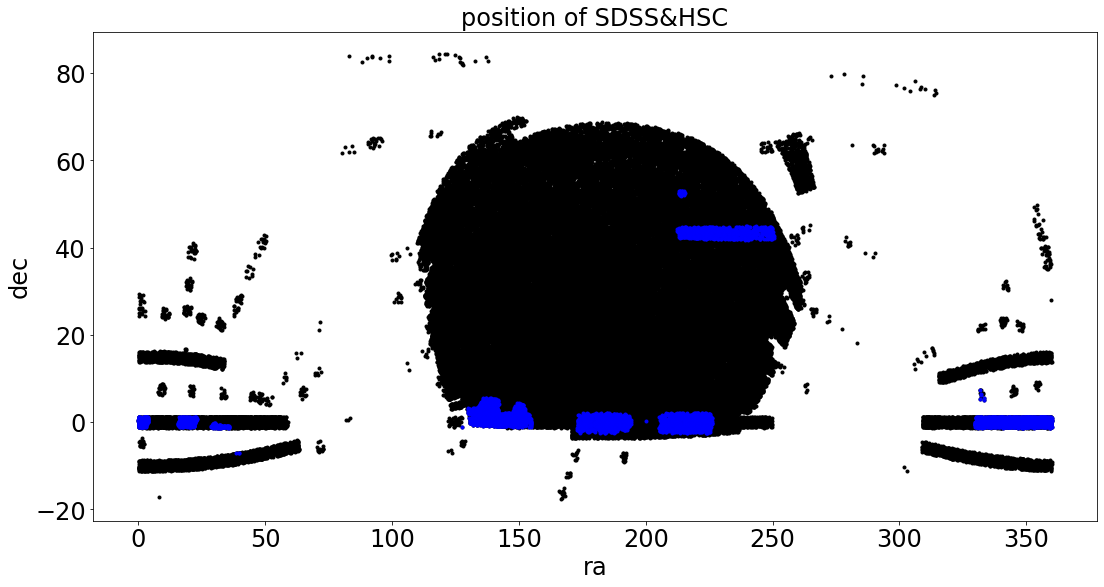

In [207]:
#设置图像尺寸，标题，xlabel，ylabel
plt.figure(figsize=(18,9))
plt.title('position of SDSS&HSC')
plt.xlabel('ra')
plt.ylabel('dec')

#画图  蓝色：HSC。黑色：SDSS
plt.scatter(df_SDSSpr['RA'],df_SDSSpr['DEC'],color='black',marker='.')  ;
plt.scatter(df_HSC['ra'],df_HSC['dec'],color='blue' ,marker='.');
plt.savefig('./FIGURES/0_1_fig_ra_dec_SDSS_HSC.pdf')

- ## 2.2.为了我可怜的小笔记本，我把数据选在赤道附近的那部分了

In [209]:
#df_SDSS是SDSS的整合数据吧，df_HSC是HSC的整合数据

df_SDSS_c=df_SDSSpr[abs(df_SDSSpr['DEC'])<10].reset_index(drop=True)
df_HSC_c=df_HSC[abs(df_HSC['dec'])<10].reset_index(drop=True)

print('SDSS:',df_SDSS_c.shape)
print('HSC:',df_HSC_c.shape)

print(np.max(abs(df_SDSS_c['DEC'])))
print(np.max(abs(df_HSC_c['dec'])))

SDSS: (30395, 13)
HSC: (5227, 9)
9.999871
7.364502652515522


In [219]:
#似乎还能在扔一些数据
df_SDSS_c=df_SDSSpr[abs(df_SDSSpr['DEC'])<7.4].reset_index(drop=True)
df_HSC_c=df_HSC[abs(df_HSC['dec'])<7.4].reset_index(drop=True)


print('SDSS:',df_SDSS_c.shape)
print('HSC:',df_HSC_c.shape)

print(np.max(abs(df_SDSS_c['DEC'])))
print(np.max(abs(df_HSC_c['dec'])))#这里数据变5200了扔掉了原理赤道的700个点

SDSS: (24368, 13)
HSC: (5227, 9)
7.399618
7.364502652515522


# 3.进行匹配
- 匹配的方法是找与hsc球面距离最短的SDSS数据

- ## 3.1.先定义球面距离函数

In [220]:
Pi=3.1415926535898
def SphereDistance(ra1,ra2,dec1,dec2):   
    '''
    输入两个赤经两个赤纬（需要换成弧度制的），
    返回它们的距离
    '''
    distance=np.arccos(np.cos(dec1)*np.cos(dec2)*np.cos(ra1-ra2)+np.sin(dec1)*np.sin(dec2))
    return distance


- ## 3.2.匹配主程序

In [221]:
#取出两个datdaframe中的赤经赤纬
ra_HSC=df_HSC_c['ra'].values/360*2*Pi
dec_HSC=df_HSC_c['dec'].values/360*2*Pi
RA_SDSS=df_SDSS_c['RA'].values/360*2*Pi
DEC_SDSS=df_SDSS_c['DEC'].values/360*2*Pi
#匹配
match=pd.DataFrame()

for i in tqdm(range(len(df_HSC_c))):#对每一个HSC数据
    temp_distance=[]
    for j in range(len(df_SDSS_c)): #取出每一个SDSS数据
        #该处循环将对应于HSC的第i个数据，所有SDSS数据与之的距离，存入temp_xxxxx
        temp_distance.append(SphereDistance(ra_HSC[i],RA_SDSS[j],dec_HSC[i],DEC_SDSS[j]))
        
    #寻找对应的最小距离的SDSS数据的位置（index）
    ##这里index恰好是数组的第i个，（没有乱排序）
    
    match_index_SDSS=np.argmin(temp_distance)
    
    ##此处loc函数在jupyter上跑不了，只能换成iloc
    t2=df_HSC_c.iloc[i]
    
    t1=df_SDSS_c.iloc[match_index_SDSS]

    #合并两个数组（此处是否有更好的办法？）
    t=pd.concat((t1, t2))
    #集合成表
    match[i]=t

##这个写的时间比较早，过程比较简陋，应该用dataframe操作
##约40min 
match1 = pd.DataFrame(match.values.T, index=match.columns, columns=match.index)

100%|██████████████████████████████████████████████████████████████████████████████| 5227/5227 [38:41<00:00,  2.25it/s]


- ## 3.3.保存数据至'./DATA/matched_data_step0.csv'

In [224]:
match1;
match1.to_csv('./DATA/matched_data_step0.csv',index=0)

In [225]:
match1

,SDSS_NAME,RA,DEC,REDSHIFT,g_SDSS,gerr_SDSS,r_SDSS,rerr_SDSS,i_SDSS,ierr_SDSS,...,LOGLBOL,ra,dec,g_HSC,gerr_HSC,r_HSC,rerr_HSC,i_HSC,ierr_HSC,hsc_id
0,b'000827.70+011452.1',2.115448,1.247824,1.2932,20.233,0.025,19.861,0.027,19.834,0.044,...,45.898412,2.115449,1.247837,20.456465,0.001646,19.987316,0.001496,20.133942,0.001326,41649667963904583
1,b'001237.35-002659.2',3.155647,-0.449796,1.9115,20.677,0.031,20.659,0.035,20.421,0.038,...,45.987873,3.155662,-0.449774,20.097397,0.003293,19.988251,0.002371,19.880039,0.001805,40585611291132377
2,b'020920.10-005003.8',32.333779,-0.834396,0.7832,19.724,0.027,19.625,0.022,19.694,0.027,...,45.613654,32.333785,-0.834404,19.758038,0.001026,19.716969,0.000998,19.816044,0.002035,40673838509344226
3,b'100114.29+022356.8',150.309567,2.399124,1.7961,19.179,0.018,19.189,0.018,18.99,0.024,...,46.388698,150.309576,2.399128,18.946459,0.000731,18.997208,0.00063,18.830339,0.000471,43158601644139081
4,b'100116.78+014053.5',150.319941,1.681554,2.0541,19.794,0.026,19.712,0.025,19.581,0.025,...,46.552036,150.319943,1.681552,19.844421,0.001275,19.794712,0.001158,19.60837,0.000697,43158584464273187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5222,b'225316.85-000648.4',343.320223,-0.113454,1.99,19.096,0.023,18.904,0.014,18.647,0.02,...,46.944604,343.320241,-0.113448,19.320828,0.000708,19.116709,0.000726,18.822708,0.00045,41597578600543116
5223,b'230347.38+001409.6',345.947425,0.236024,1.284,20.424,0.026,20.192,0.025,20.143,0.035,...,45.719604,345.947429,0.236026,20.513886,0.001286,20.2624,0.001184,20.284775,0.00164,42675349103870114
5224,b'232206.78+002646.0',350.528268,0.446129,2.134,20.206,0.032,20.299,0.036,19.934,0.042,...,46.277736,350.528278,0.446143,20.491119,0.001618,20.552746,0.003048,20.018433,0.00132,42688410099415575
5225,b'235154.18-010742.2',357.975763,-1.128394,1.1359,19.85,0.034,19.587,0.023,19.554,0.027,...,45.902758,357.975765,-1.128373,20.426828,0.003587,20.012787,0.002172,20.048004,0.002101,41641675029761434
